<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla y Ignacio Meza D.
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias y Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1:
- Nombre de alumno 2:


### **Link de repositorio de GitHub:** `http://....`

### Indice 

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [50]:
# Libreria Core
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 
from sklearn.inspection import permutation_importance

# Transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import HistGradientBoostingRegressor
import xgboost as xgb


# Metricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


#Libreria para plotear
#!pip install --upgrade plotly
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

In [51]:
#Importar CSV
df = pd.read_csv('diabetes_data.csv')
df.head(4)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0


## 2. Clasificación de pacientes con diabetes (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.), comente sus decisiones y los resultados obtenidos con el modelo. ¿Es acaso un buen predictor de diabetes?, ¿Qué buscan explicar las métricas utilizadas?, ¿las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo una buena elección de las features?. 

In [52]:
#!pip install xgboost

In [53]:
# Inserte su código aquí
# EDA
def EDA(df):
    print('1.- El DataFrame tiene {i} filas y {j} columnas \n'.format(i = str(df.shape[0]),j = str(df.shape[1])))
    print('2.- El DataFrame esta compuesto por las siguientes columnas: \n'+str(list(df.columns))+' \n')
    print('3.- Descripción numérica del Dataframe:')
    display(df.describe().T)
    print('4.- Cantidad de valores nulos por columna:')
    print(df.isna().sum())
    print('5.- Tipo de datos por columna:')
    print(df.dtypes.value_counts())
    print('6.- Unicidad de datos:')
    print(df.nunique())
EDA(df)


1.- El DataFrame tiene 70692 filas y 18 columnas 

2.- El DataFrame esta compuesto por las siguientes columnas: 
['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP', 'Diabetes'] 

3.- Descripción numérica del Dataframe:


,count,mean,std,min,25%,50%,75%,max
Age,70692.0,8.584055,2.852153,1.0,7.0,9.0,11.0,13.0
Sex,70692.0,0.456997,0.498151,0.0,0.0,0.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0
Veggies,70692.0,0.788774,0.408181,0.0,1.0,1.0,1.0,1.0


4.- Cantidad de valores nulos por columna:
Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64
5.- Tipo de datos por columna:
float64    18
Name: count, dtype: int64
6.- Unicidad de datos:
Age                     13
Sex                      2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
GenHlth                  5
MentHlth                31
PhysHlth                31
Diff

Las variables ya se encuentran preprocesadas, específicamente variables categóricas como Sexo y Stroke (con 2 valores únicos) ya se hallan representadas numéricamente como one-hot-encoding.
Age, BMI, GenHlth, MentHlth y PhysHlth son las únicas variables numéricas continuas.
Debido a que se aplicará un modelo de ensamblado tipo XGBoost, no es necesario escalar las variables numéricas, por ende se aplicará el modelo directamente sobre el dataset preprocesado.

In [96]:
features=df.drop(columns=['Diabetes'])
target=df['Diabetes']
X_train, X_test, y_train, y_test  = train_test_split(features, target, test_size=0.2  ,shuffle= True, random_state=33 , stratify=target)

In [97]:
#entrenar el modelo
from xgboost import XGBClassifier
modelo_xgboost = XGBClassifier()
modelo_xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [98]:
from sklearn.metrics import classification_report

#hacer predicciones
y_pred = modelo_xgboost.predict(X_test)

#evaluar el modelo con classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.70      0.74      7070
         1.0       0.73      0.79      0.76      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



## 3. Importancia de las features con XGBoost (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

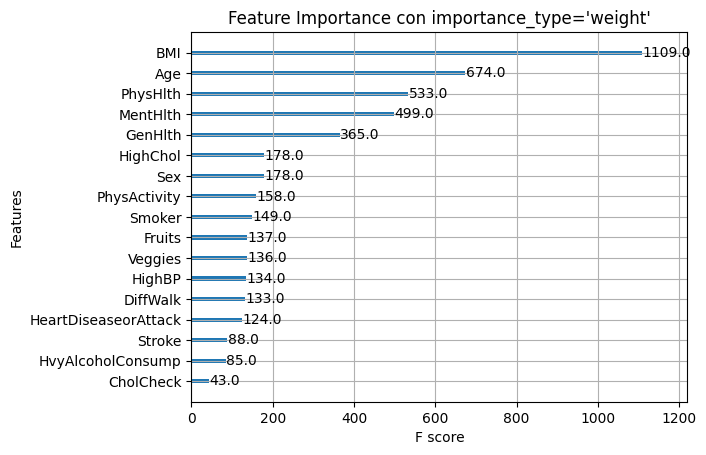

In [99]:
xgb.plot_importance(modelo_xgboost, max_num_features=20, importance_type='weight')

plt.title("Feature Importance con importance_type='weight'")

plt.show()

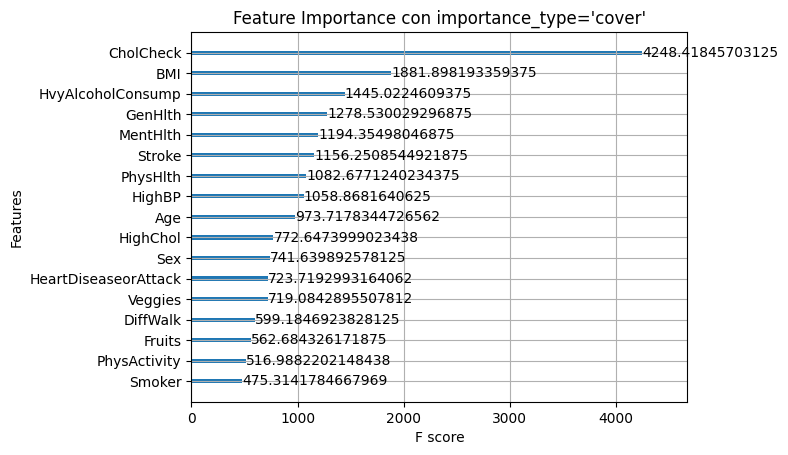

In [100]:
xgb.plot_importance(modelo_xgboost, max_num_features=20,importance_type='cover')
plt.title("Feature Importance con importance_type='cover'")
plt.show()

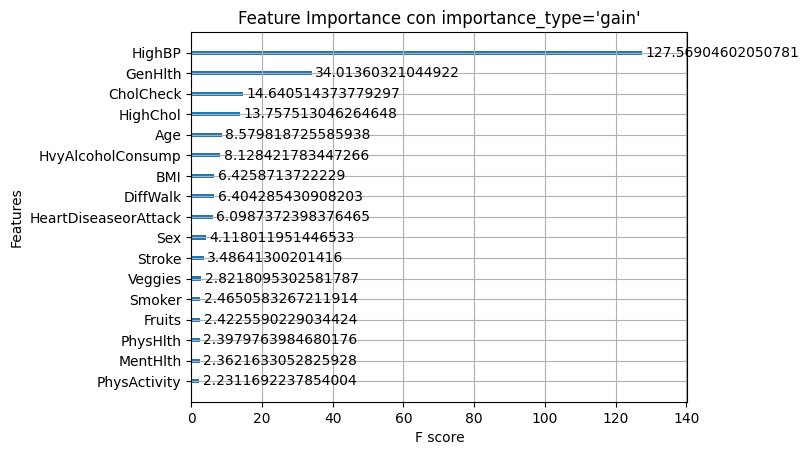

In [101]:
xgb.plot_importance(modelo_xgboost, max_num_features=20,importance_type='gain')
plt.title("Feature Importance con importance_type='gain'")
plt.show()

    Los 3 métodos muestran resultados diferentes, dificilmente concordables. Para el parámetro "weight" los atributos más importantes son el BMI y la Edad. Para "cover", son CholCheck y BMI, mientras que para "Gain" son HighBP y GenHlth.
    Las diferencias son debidas a que cada método calcula la importancia de los atributos de manera diferente. "Weight" calcula la importancia de un atributo como la cantidad de veces que este es utilizado para dividir los datos en los árboles. "Cover" calcula la importancia de un atributo como la cantidad de veces que este es utilizado para dividir los datos en los árboles, ponderado por la cantidad de datos que son afectados por la división. "Gain" calcula la importancia de un atributo como la ganancia de información que se obtiene al dividir los datos en el árbol. La debilidad es apararente dado que si los atributos poseen elevada cardinalidad, estos aparecerán más en un arbol sólo porque pueden ser divididos más veces (que es lo que pasa exactamente para BMI y Edad).
    De estas 3 metodologías se rescata más el uso de "Gain" que apunta a la disminución de la función de pérdida (missclasification), lo que es más intuitivo que las otras 2. Por ende se esperaría que fueran más importantes HighBP y GenHlth.
    A pesar de lo anterior se deben utilizar otros métodos agnósticos al modelo para obtener una mejor interpretabilidad, que no dependan exclusivamente de su estructura.

## 4. Métodos Agnósticos Globales (1 pt)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. Visualice los resultados de este método en un gráfico. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?). Además, responda las siguientes preguntas:


- ¿Cómo mide la importancia de las features su propuesta?
- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?
- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

In [102]:
# Inserte su código aquí
result = permutation_importance(modelo_xgboost, X_test, y_test, n_repeats=30, random_state=42)

In [103]:
result

{'importances_mean': array([ 0.02610746,  0.0006719 ,  0.01217436,  0.00407384,  0.03002098,
        -0.00014617,  0.00448641, -0.00036778, -0.00060353,  0.00037721,
         0.00333593,  0.05769385, -0.00026169, -0.00106561,  0.00347031,
         0.00079214,  0.01544428]),
 'importances_std': array([0.00206126, 0.00102878, 0.00138519, 0.00075152, 0.00217608,
        0.00059649, 0.00103362, 0.00081267, 0.00086828, 0.00068092,
        0.00079434, 0.00220215, 0.00094027, 0.00091507, 0.00110507,
        0.00060962, 0.00134038]),
 'importances': array([[ 2.62394795e-02,  2.65931113e-02,  2.63809322e-02,
          2.77954594e-02,  2.27031615e-02,  2.50371313e-02,
          2.89978075e-02,  2.56736686e-02,  2.33396987e-02,
          2.73003748e-02,  2.53200368e-02,  2.70174694e-02,
          2.75832803e-02,  2.14300870e-02,  2.56736686e-02,
          2.68052903e-02,  2.66638376e-02,  2.80076384e-02,
          2.41884150e-02,  3.02001556e-02,  2.78661857e-02,
          2.87856284e-02,  2.2915

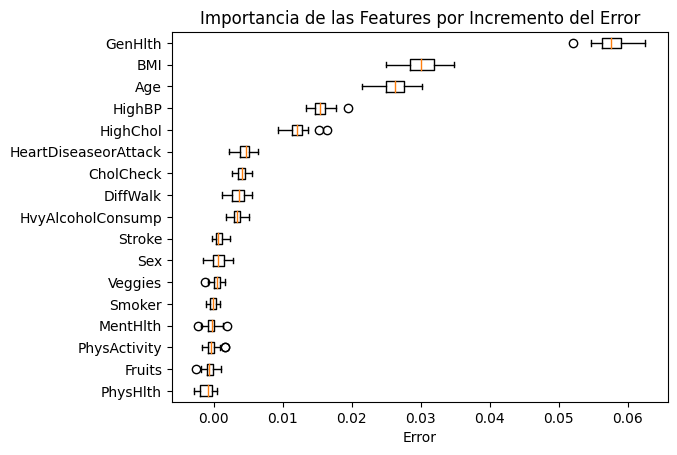

In [104]:
perm_sorted_idx = result.importances_mean.argsort()
plt.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=np.array(df.columns)[perm_sorted_idx],
)
plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()

    1. La importancia basada en permutación se basa en que la perturbación o aleatorización de las variables predictivas debiesen afectar negativamente el rendimiento del modelo si es que esta variable es importante para la predicción, de esta forma la importancia se calcula: (a) Entrenando el modelo y midiendo su rendimiento de acuerdo a una métrica. (b) Permutación aleatoria de los valores de una variable en el conjunto de prueba manteniendo constante las demás variables. (c) Evaluación del modelo permutado y medición de su rendimiento de acuerdo a la misma métrica. (d) Cálculo de la importancia de la variable como la diferencia entre el rendimiento del modelo original y el rendimiento del modelo permutado. (e) Las variables más importantes son aquellas que tienen mayor impacto en la diferencia de rendimientos.
    2. Las 5 variables más importantes son: GenHlth (distintivamente mayor), BMI y Age con importancia similar e intermedia, y HighBP y HighCol con similar importancia pero menor. Sus desviaciones estándar también son mayores que para las variables menos importantes. Estas tienen sentido, intuitivamente se espera que estos atributos impacten en la predicción de diabetes.
    3. La única variable que no aparece es CholCheck, que fue detectada como importante según los métodos anteriores. Las demás variables vuelven a aparecer pero en diferente ranking. Ninguno de los métodos detecto a GenHlth como el atributo más importante.
    4. Dentro de las ventajas:
        - Fácil comprensión e interpretabilidad global
        - Método agnóstico que no depende de la estructura del modelo
        - No se requiere reentrenar el modelo
    Dentro de las desventajas:
        - En el caso de variables correlacionadas, la importancia de una variable puede ser subestimada
        - Se pueden generar entradas poco realistas al permutar, especialmente si existen variables correlacionadas.
        - Se necesita acceso a la gold label para calcular la importancia de las variables.

## 5. Métodos Agnósticos Locales (2 pt)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### Parte A (0.4 pt)

Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. ¿Qué representa cada número en su resultado? ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

In [105]:
#!pip install shap

In [106]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [107]:
# Inserte código para calcular shapley values aquí
import shap
explainer = shap.TreeExplainer(modelo_xgboost)
shap_values = explainer(features)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [129]:
shap_values

.values =
array([[-1.4656905 , -0.0236693 , -0.46172282, ..., -0.10936183,
        -0.01796997,  0.4757374 ],
       [ 0.128751  ,  0.07051966,  0.12777194, ..., -0.05089455,
         0.04901624,  0.40799403],
       [ 1.0195371 ,  0.29099476, -0.1342141 , ..., -0.07517039,
        -0.02308417, -0.6869046 ],
       ...,
       [-0.00883076, -0.01641866,  0.2971411 , ...,  0.31968477,
        -0.01587586,  0.44990104],
       [ 0.41470596, -0.30035445,  0.33162314, ...,  0.411488  ,
        -0.01387676,  0.55772144],
       [ 0.06235699, -0.00538495,  0.2310628 , ..., -0.12005083,
        -0.03370849,  0.5220183 ]], dtype=float32)

.base_values =
array([-0.0091748, -0.0091748, -0.0091748, ..., -0.0091748, -0.0091748,
       -0.0091748], dtype=float32)

.data =
array([[ 4.,  1.,  0., ...,  0.,  0.,  1.],
       [12.,  1.,  1., ...,  0.,  1.,  1.],
       [13.,  1.,  0., ...,  0.,  0.,  0.],
       ...,
       [13.,  0.,  1., ...,  1.,  0.,  1.],
       [11.,  0.,  1., ...,  1.,  0.,  1.]

Los valores de shap representan la contribución de cada una de los atributos predictores a la salida del modelo, en este caso la probabilidad de presentar diabetes. Por ende, la positividad o negatividad de cada valor significa el aporte positivo o negativa de cada característica a la probabilidad de la clase 1, para esa observación (persona) en particular. Por ende un valor de shap positivo para una persona significa que esa característica contribuye a presentar diabetes.
Por otra parte, el valor base es el valor esperado de la salida si no tuviera información sobre las características. Se calcula promediando las predicciones del modelo en un gran conjunto de datos de ejemplos. El valor base se utiliza como punto de referencia para comprender cómo contribuyen las características de un ejemplo concreto a la predicción del modelo para ese ejemplo.

### Parte B (0.4 pt)

Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:
- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? 
- ¿Existe algún patrón común entre las instancias analizadas? 
- ¿Es posible generalizar estas conclusiones a todo el dataset?

In [109]:
# Inserte código para generar gráficos de aporte local aquí
idx = 1

shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values.values[idx,:], 
                features.iloc[idx,:],
                link="logit")

In [110]:
idx = 9

shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values.values[idx,:], 
                features.iloc[idx,:],
                link="logit")

In [111]:
idx = 150

shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values.values[idx,:], 
                features.iloc[idx,:],
                link="logit")

    Las variables que se observan afectan de manera positiva a poseer diabetes son: HighBP(1), HighCol(1), GenHlth(3). De manera contraria las que contribuyen negativamente son HighBP(0) y BMI(~20). La edad también pareciera ser importante pero la forma en que impacta no es clara. Existen patrones comunes entre la instancia 1 y 150 en que los factores más relevantes son BMI y HighBP, sin embargo estos patrones no son generalizables a todo el dataset, ya que por ejemplo en la instancia 9 el factor más relevante es GenHlth y HighBP. Esto tiene sentido pues los valores de Shap son específicos para cada observación, al ser un método de interpretación local.

### Parte C (0.4 pt)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

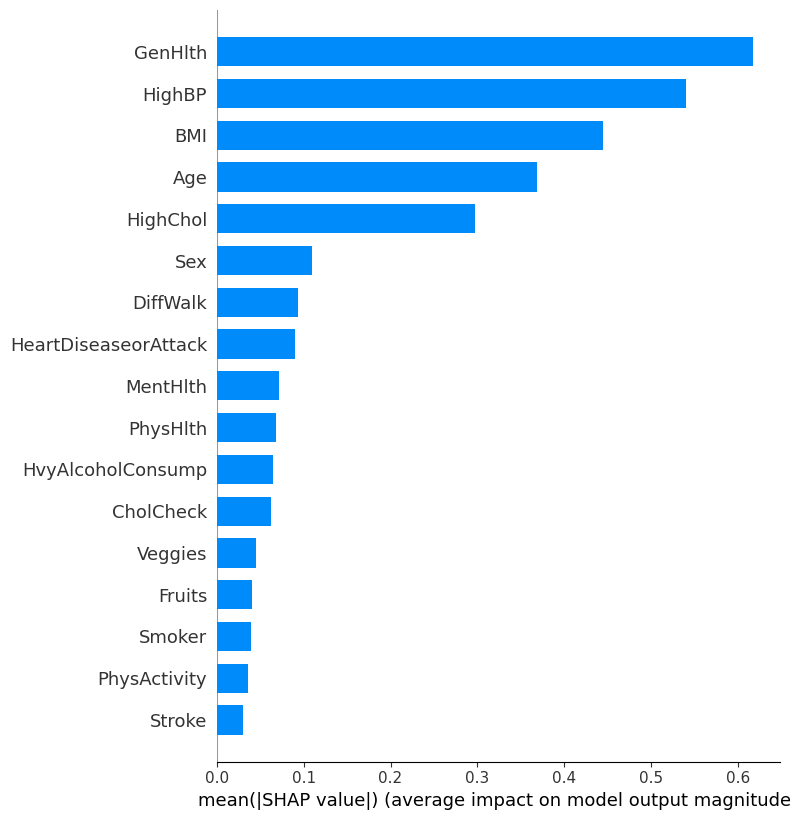

In [119]:
# Inserte código para generar gráficos de aporte global aquí
shap.summary_plot(shap_values, features, plot_type="bar")

    Se observa que las variables mencionadas mediante el método local se encuentran en el top 5 de la importancia de variables de manera global, sin embargo, no en el orden esperado. A partir de las instancias individuales se esperaba que la variable más importante fuera HighBP y BMI, sin embargo estas se encuentran en 2do y 3er lugar, siendo superadas por GenHlth. Esto puede deberse a que el método de interpretación local es más sensible a las características de cada observación, mientras que el método global es más robusto a estas variaciones.

### Parte D (0.4 pt)

Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

In [120]:
# obtenemos los shap values
shap_values_abs = np.mean(np.abs(shap_values.values), axis=0)

# Obtenemos los nombres ordenados de mayor a menor
feature_importance_names = X_train.columns[shap_values_abs.argsort()[::-1]]

In [122]:
y_proba = modelo_xgboost.predict_proba(features)[:,1]

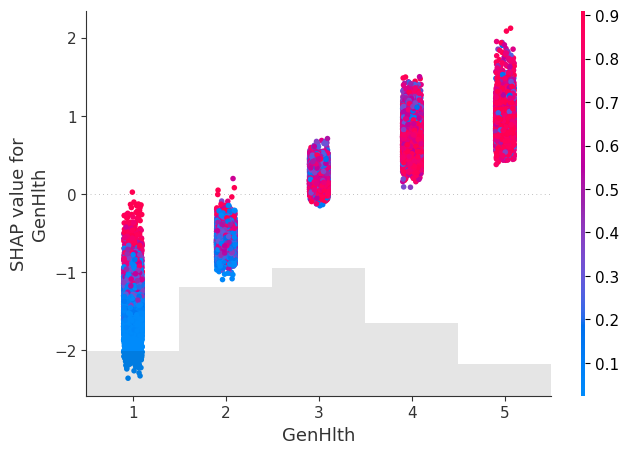

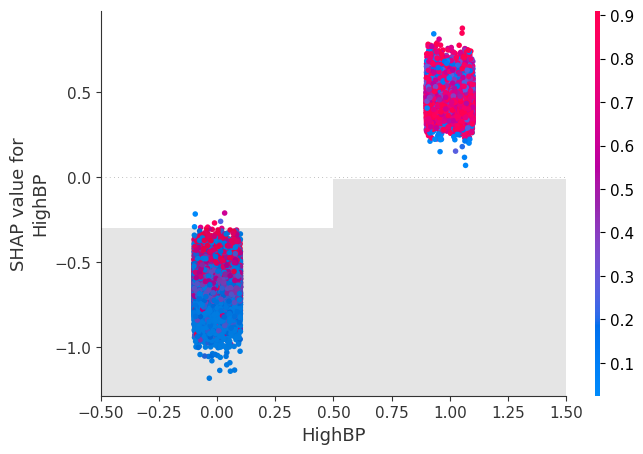

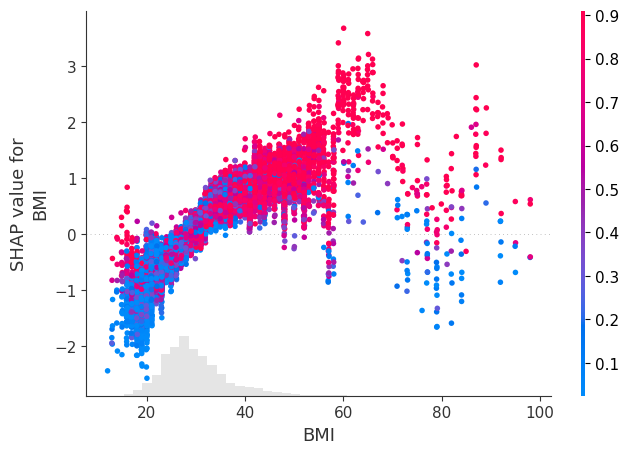

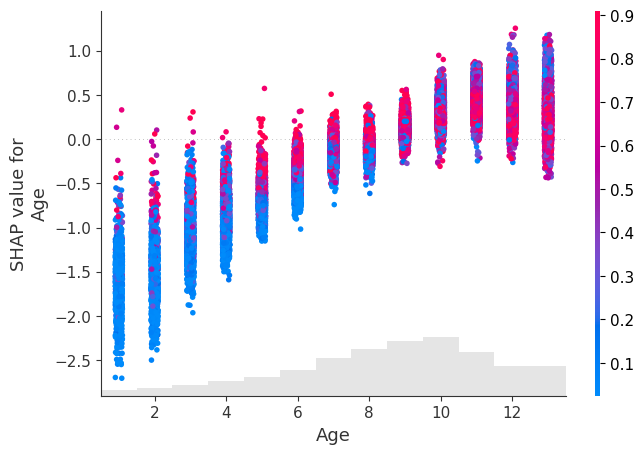

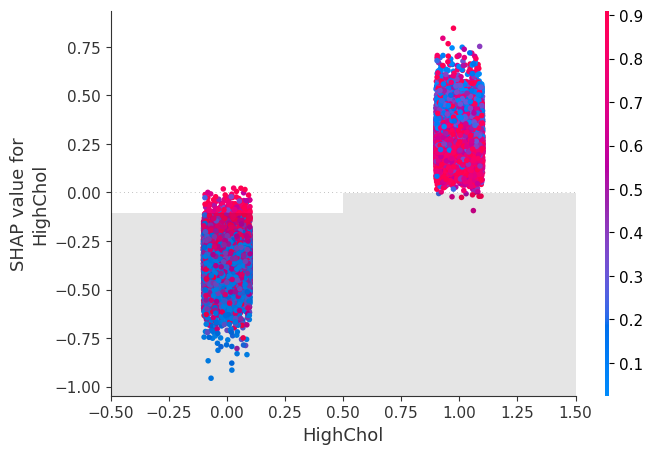

In [123]:
# Inserte código para generar gráficos de feature vs shap value aquí
for name in feature_importance_names[:5]:
    #shap.dependence_plot(name, shap_values.values, X)
    shap.plots.scatter(shap_values[:,name], 
                   color=y_proba)

    La primera observación, es que no existe ninguna categoría única que contenga exclusivamente personas con diabetes. Sin embargo si se observan patrones/tendencias diferentes para diferentes valores de cada atributo.
    - En primer lugar, para la variable que fue asignada como la más importante para el modelo (GenHlth - Salud General), la cantidad de personas con probabilidad alta de presentar diabetes aumenta a medida que la clase aumenta, siendole asignadas contribuciones positivas a partir de la clase 3 en adelante. Se deduce que, a medida que la salud general de una persona empeora, aumenta la probabilidad de presentar diabetes (siendo la clase 3 aquella que marca el punto de inflexión). A pesar de esto, es importante destacar que personas con salud excelente también presentan diabete (probablemente por interacción con otros factores).
    - En segundo lugar, presencia de alta presión arterial (HighBP) se relaciona con contribuciones positivas a la probabilidad de diabetes.
    - En tercer lugar, los valores SHAP de BMI presentan elevada dispersion pero se observa una tendencia general a que a medida que el BMI aumenta, los aportes positivos a predecir diabete también lo hacen, aumentando notoriamente a partir de un BMI de 30 y 40.
    - En cuarto lugar, se tienen valores de edad hasta 13 años, se observa una clara tendencia positiva a medida que la edad aumenta, sin embargo no se observa una edad clara a la cual aumente notoriamente la probabilidad de diabetes.
    - En quinto lugar, la presencia de alto colesterol (HihgChol) también se le asigna aporte positivo a la detección de diabetes, sin embargo, esta relación no es tan clara como en los casos anteriores dado que existen cantidades personas con diabetes de manera más balanceada en ambos grupos que en casos anteriores (y por ende su importancia como variable es menor que en los otros casos).

### Parte E (0.4 pt)

Finalmente, se le pide generar un gráfico del tipo **Partial Dependence Plot** para las mismas 5 variables con mayor impacto global usando una submuestra de **1000 observaciones**. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

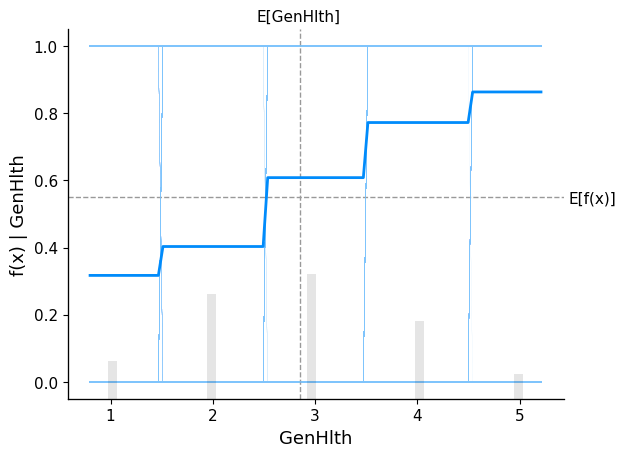

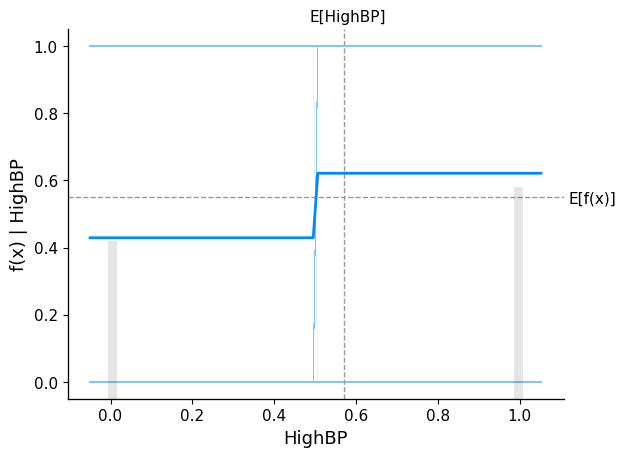

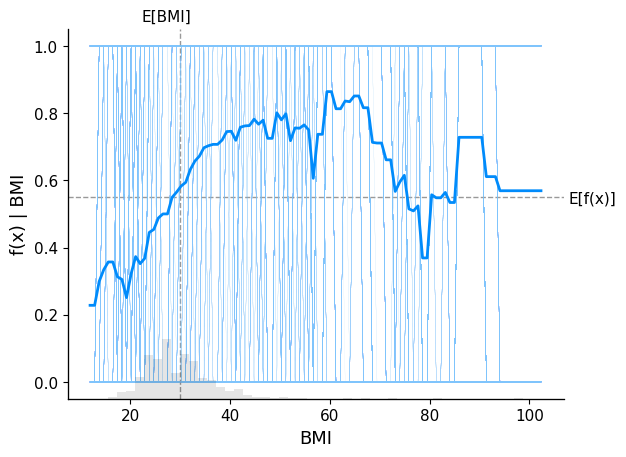

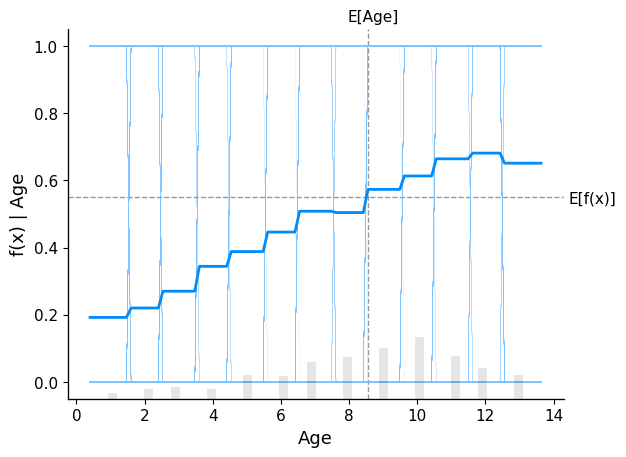

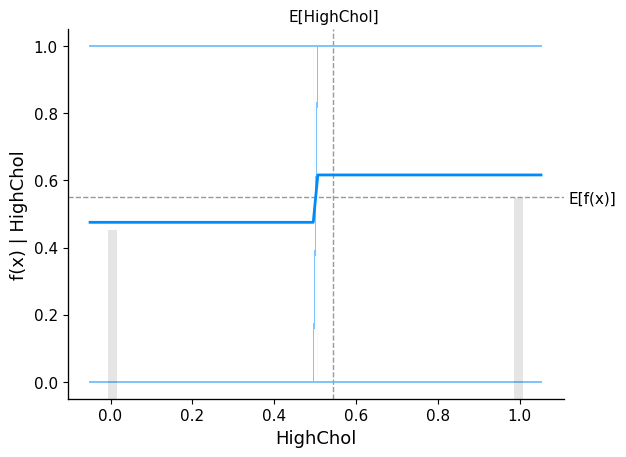

In [125]:
# Inserte código para generar gráficos PDP aquí

X1000 = shap.utils.sample(features, 1000)

for name in feature_importance_names[:5]:
    shap.partial_dependence_plot(
        name, modelo_xgboost.predict, X1000, model_expected_value=True,
        feature_expected_value=True, ice=True
    )

Los gráficos PDP apoyan la interpretación hecha anteriormente y son más claros para obtener dichas conclusiones, dado que se puede observar claramente los puntos en que las contribuciones transicionan entre negativas y positivas. Especialmente ayudan a interpretar de mejor forma el BMI, donde se observa un aumento y posteriormente una disminución en BMI muy altos (esto podría deberse a que las únicas personas que sobreviven a estos BMI son aquellas que no poseen diabetes por ende habría un sesgo de selección)
Estas conclusiones son generalizables para todo el conjunto de datos, dado que se utilizo un método agnóstico global (obteniendo la influencia de cada variable manteniendo las otras constantes).

## 6. Sistema de Reglas! (1 pt)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [128]:
#!pip install alibi

In [126]:
from alibi.explainers import AnchorTabular

In [127]:
# Inserte su código para generar sistema de reglas aquí

predict_fn = lambda x: modelo_xgboost.predict(x)
explainer = AnchorTabular(predict_fn, modelo_xgboost.feature_names_in_, seed=1)
explainer.fit(X_train.to_numpy())
class_names = ['No Diabetes', 'Diabetes']

idx = 1000
# explicar predicción idx 1000
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Index: ', idx)
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)
print('\n')

idx = 3001
# explicar predicción idx 3001
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Index: ', idx)
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)
print('\n')

idx = 5751
# explicar predicción idx 5751
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Index: ', idx)
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

Index:  1000
Prediction:  Diabetes
Anchor: GenHlth > 2.00 AND HeartDiseaseorAttack > 0.00 AND Age > 9.00
Precision: 0.98
Coverage: 0.08


Index:  3001
Prediction:  No Diabetes
Anchor: BMI <= 25.00 AND HighBP <= 0.00 AND HighChol <= 0.00
Precision: 0.96
Coverage: 0.12


Index:  5751
Prediction:  No Diabetes
Anchor: BMI <= 25.00 AND HighBP <= 0.00 AND HighChol <= 0.00
Precision: 0.98
Coverage: 0.12


    Esencialmente se obtienen 2 sets de reglas, ya que las reglas aplicadas para la observacion 3001 y 5751 son las mismas. Se observa que para la observación 1000 se obtiene un anchor con una precisión elevada de 0.98 pero con una cobertura de 0.08, es decir considerando que el set de testeo es de 14139, entonces aproximadamente 1131 personas se les predecirá Diabetes usando exclusivamente la regla de (Salud general peor que 2, con ataque cardiaco y edad mayor a 9 años). El otro set de reglas posee una cobertura del 12%, más que el anterior, asignandole Sin Diabetes a personas con BMI <25, sin presión alta ni colesterol alto.
    Las reglas tienen sentido de acuerdo al análisis marginal que vimos anteriormente, sin embargo no pueden ser aplicadas a todo el conjunto de datos, dado que entre ambas se cubre un 20% de los datos a predecir. Esto se debe a que el modelo es muy complejo (con muchas interacciones) y no se puede explicar en su totalidad con reglas simples, por lo que se requiere de un conjunto de reglas muy grande para poder explicar la totalidad de los datos.

# Retrospectiva... (1 pt)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

    Los métodos que mejores conclusiones entregan para el problema en cuestión son la importancia de variables mediante permutación y la importancia global y local de variables mediante Shap Values. Esto se debe a que permiten obtener conclusiones globales y locales de manera agnóstica, es decir, sin importar el modelo que se utilice. Ambos métodos detectan las mismas 5 variables como las más relevantes en el dataset, difiriendo solo en el ranking de HighBP. Por otro lado, los métodos agnósticos globales (ej: PDP) son más útiles para el problema del doctor Simi, dado que primeramente se requiere de una interpretación global para el entendimiento general del problema de predicción de diabetes, considerando en primera instancia qué variables médicas podrían estar relacionadas con la presencia de la enfermedad. Una vez se transicione a un entendimiento más fino del problema, tal como el de querer entender y explicar las predicciones para clientes particulares, se recomendaría utilizar métodos agnósticos locales que puedan de determinar qué características son importantes para estos clientes o bien clustering de clientes.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>